In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

import os

In [2]:
os.chdir('F:\BNL\BNL_DATA\Plasmonics_QD_HongHu') 

In [39]:
columns = ['x', 'y', 'z', 'Color']
innerData = pd.read_csv('polar1_em_605nm_1.txt', skiprows = 8, header = None, names = columns, sep = '\s+')
outerData = pd.read_csv('polar1_em_605nm_2.txt', skiprows = 8, header = None, names = columns, sep = '\s+')

outerData.head()

,x,y,z,Color
0,9.952377e-08,0,-1.666490e-07,38.264366
1,1.055308e-07,0,-1.698919e-07,38.137213
2,1.050945e-07,0,-1.631887e-07,38.260321
3,9.990333e-08,0,-1.732609e-07,38.146745
4,9.914421e-08,0,-1.600372e-07,38.376676


In [25]:
outerPoints = np.transpose([outerData['x'], outerData['z']])
outerValues = outerData['Color'].values
outerPoints1 = np.transpose([-outerData['x'], outerData['z']])
outerValues1 = outerData['Color'].values
outerPoints = np.append(outerPoints, outerPoints1, axis = 0)
outerValues = np.append(outerValues, outerValues1, axis = 0)

innerPoints = np.transpose([innerData['x'], innerData['z']])
innerValues = innerData['Color'].values
innerPoints1 = np.transpose([-innerData['x'], innerData['z']])
innerValues1 = innerData['Color'].values
innerPoints = np.append(innerPoints, innerPoints1, axis = 0)
innerValues = np.append(innerValues, innerValues1, axis = 0)

In [52]:
def inCircle(grid_x0, grid_y0, x0, y0, radius):
    grid = grid_x0 + complex(0, 1) * grid_y0
    center1 = x0 + complex(0, 1) * y0
    center2 = -x0 + complex(0, 1) * y0
    for i in range(len(grid)):
        for j in range(len(grid[i])):
            if (abs(grid[i][j] - center1) > radius) & (abs(grid[i][j] - center2) > radius):
                grid[i][j] = np.nan
    return grid.real, grid.imag

def outCircle(grid_x0, grid_y0, x0, y0, radius):
    grid = grid_x0 + complex(0, 1) * grid_y0
    center1 = x0 + complex(0, 1) * y0
    center2 = -x0 + complex(0, 1) * y0
    for i in range(len(grid)):
        for j in range(len(grid[i])):
            if (abs(grid[i][j] - center1) < 0.999 * radius) or (abs(grid[i][j] - center2) < 0.999 * radius):
                grid[i][j] = np.nan
    return grid.real, grid.imag

xmin, xmax = -1.05e-7, 1.05e-7
ymin, ymax = -1.7e-7, -0.3e-7
x0, y0 = 0.46e-7, -1.0e-7
radius = 0.25e-7
grid_x0, grid_y0 = np.mgrid[xmin : xmax : 1200j, ymin : ymax : 600j]
grid_x1, grid_y1 = inCircle(grid_x0, grid_y0, x0, y0, radius)
grid_x2, grid_y2 = outCircle(grid_x0, grid_y0, x0, y0, radius)

grid_z2 = griddata(outerPoints, outerValues, (grid_x2, grid_y2), method='cubic')
grid_z1 = griddata(innerPoints, innerValues, (grid_x1, grid_y1), method='cubic')

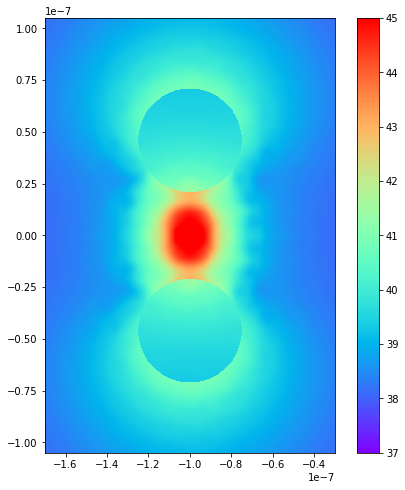

In [56]:
limit = (ymin, ymax, xmin, xmax)
colormin, colormax = 37, 45

fig, ax = plt.subplots(figsize = (8, 8))
outer = ax.imshow(grid_z2, cmap = plt.cm.rainbow, extent = limit, vmin = colormin, vmax = colormax)
inner = ax.imshow(grid_z1, cmap = plt.cm.rainbow, extent = limit, vmin = colormin, vmax = colormax)
fig.colorbar(outer, ax=ax)